# Covid - 19 Case, Death, Recovery Prediction

In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt  


In [2]:
data = pd.read_csv("covid_19_data.csv")
df = data.copy()

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              6722 non-null   int64  
 1   ObservationDate  6722 non-null   object 
 2   Province/State   3956 non-null   object 
 3   Country/Region   6722 non-null   object 
 4   Last Update      6722 non-null   object 
 5   Confirmed        6722 non-null   float64
 6   Deaths           6722 non-null   float64
 7   Recovered        6722 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.2+ KB


In [6]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,6722.000000,6722.000000,6722.000000,6722.000000
mean,3361.500000,601.195924,19.855846,226.341267
std,1940.618587,4896.332140,204.486922,2556.035202
min,1.000000,0.000000,0.000000,0.000000
25%,1681.250000,2.000000,0.000000,0.000000
50%,3361.500000,13.000000,0.000000,0.000000
75%,5041.750000,108.000000,1.000000,11.000000
max,6722.000000,67800.000000,3122.000000,56927.000000


In [12]:
cols=df.columns
df.columns=[col.lower() for col in cols]

df.rename(columns={'observationdate':'observation_date',
                  'country/region':'country'},inplace=True)
df.head()

,sno,observation_date,province/state,country,last update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [13]:
df.drop('last update',inplace=True,axis=1)

In [14]:
df.drop(['province/state','sno'],inplace=True,axis=1)

In [15]:
df.drop(['country'],inplace=True,axis=1)

In [16]:
df

,observation_date,confirmed,deaths,recovered
0,01/22/2020,1.0,0.0,0.0
1,01/22/2020,14.0,0.0,0.0
2,01/22/2020,6.0,0.0,0.0
3,01/22/2020,1.0,0.0,0.0
4,01/22/2020,0.0,0.0,0.0
...,...,...,...,...
6717,03/18/2020,0.0,0.0,0.0
6718,03/18/2020,0.0,0.0,0.0
6719,03/18/2020,0.0,0.0,0.0
6720,03/18/2020,0.0,0.0,0.0


In [18]:
df['infected']= df['confirmed']- df['deaths']- df['recovered']

In [19]:
df

,observation_date,confirmed,deaths,recovered,infected
0,01/22/2020,1.0,0.0,0.0,1.0
1,01/22/2020,14.0,0.0,0.0,14.0
2,01/22/2020,6.0,0.0,0.0,6.0
3,01/22/2020,1.0,0.0,0.0,1.0
4,01/22/2020,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6717,03/18/2020,0.0,0.0,0.0,0.0
6718,03/18/2020,0.0,0.0,0.0,0.0
6719,03/18/2020,0.0,0.0,0.0,0.0
6720,03/18/2020,0.0,0.0,0.0,0.0


In [22]:
df['observation_date'] = pd.to_datetime(df['observation_date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  6722 non-null   datetime64[ns]
 1   confirmed         6722 non-null   float64       
 2   deaths            6722 non-null   float64       
 3   recovered         6722 non-null   float64       
 4   infected          6722 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 262.7 KB


In [24]:
df

,observation_date,confirmed,deaths,recovered,infected
0,2020-01-22,1.0,0.0,0.0,1.0
1,2020-01-22,14.0,0.0,0.0,14.0
2,2020-01-22,6.0,0.0,0.0,6.0
3,2020-01-22,1.0,0.0,0.0,1.0
4,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6717,2020-03-18,0.0,0.0,0.0,0.0
6718,2020-03-18,0.0,0.0,0.0,0.0
6719,2020-03-18,0.0,0.0,0.0,0.0
6720,2020-03-18,0.0,0.0,0.0,0.0


In [25]:
df.groupby('observation_date').sum()

,confirmed,deaths,recovered,infected
observation_date,,,,
2020-01-22,555.0,17.0,28.0,510.0
2020-01-23,653.0,18.0,30.0,605.0
2020-01-24,941.0,26.0,36.0,879.0
2020-01-25,1438.0,42.0,39.0,1357.0
2020-01-26,2118.0,56.0,52.0,2010.0
2020-01-27,2927.0,82.0,61.0,2784.0
2020-01-28,5578.0,131.0,107.0,5340.0
2020-01-29,6165.0,133.0,126.0,5906.0
2020-01-30,8235.0,171.0,143.0,7921.0


In [26]:
df = df.groupby('observation_date').sum().reset_index()

In [27]:
df

,observation_date,confirmed,deaths,recovered,infected
0,2020-01-22,555.0,17.0,28.0,510.0
1,2020-01-23,653.0,18.0,30.0,605.0
2,2020-01-24,941.0,26.0,36.0,879.0
3,2020-01-25,1438.0,42.0,39.0,1357.0
4,2020-01-26,2118.0,56.0,52.0,2010.0
5,2020-01-27,2927.0,82.0,61.0,2784.0
6,2020-01-28,5578.0,131.0,107.0,5340.0
7,2020-01-29,6165.0,133.0,126.0,5906.0
8,2020-01-30,8235.0,171.0,143.0,7921.0
9,2020-01-31,9925.0,213.0,222.0,9490.0


In [28]:
df['day_count'] = (df.observation_date - df.observation_date.min()).dt.days

In [29]:
df.drop('observation_date', inplace = True, axis = 1)

In [30]:
df

,confirmed,deaths,recovered,infected,day_count
0,555.0,17.0,28.0,510.0,0
1,653.0,18.0,30.0,605.0,1
2,941.0,26.0,36.0,879.0,2
3,1438.0,42.0,39.0,1357.0,3
4,2118.0,56.0,52.0,2010.0,4
5,2927.0,82.0,61.0,2784.0,5
6,5578.0,131.0,107.0,5340.0,6
7,6165.0,133.0,126.0,5906.0,7
8,8235.0,171.0,143.0,7921.0,8
9,9925.0,213.0,222.0,9490.0,9


In [31]:
X = df['day_count'].values.reshape(-1,1)
y1 = df['confirmed']

Model for 'Confirmed':

In [32]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=101)

In [33]:
model = LinearRegression()
model.fit(X_train, y1_train)

LinearRegression()

In [34]:
y1_pred = model.predict(X_test)

In [35]:
df1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})

In [36]:
df1

,Actual,Predicted
20,44803.0,46261.364646
16,34392.0,34011.433961
42,95124.0,113635.983415
26,73260.0,64636.260674
1,653.0,-11925.806109
24,69032.0,58511.295332
32,78985.0,83011.156702
48,118582.0,132010.879443
44,101800.0,119760.948758
18,40151.0,40136.399304


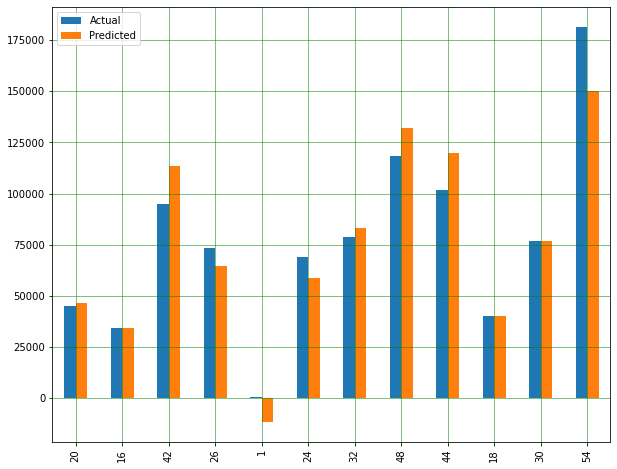

In [37]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

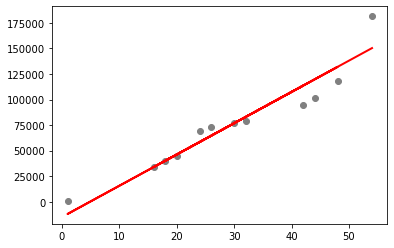

In [39]:
plt.scatter(X_test, y1_test,  color='gray')
plt.plot(X_test, y1_pred, color='red', linewidth=2)
plt.show()

In [73]:
R2 = metrics.r2_score(y1_test, y1_pred)
print('R^2:' , R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Adjusted R^2 :'  , 1 - metrics.r2_score(y1_test, y1_pred))
print('Mean Absolute Error:' , metrics.mean_absolute_error(y1_test, y1_pred)) 
print('Mean Squared Error:' , metrics.mean_squared_error(y1_test, y1_pred)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

R^2: 0.9081493592042217
Adjusted R^2 : 0.8989642951246438
Adjusted R^2 : 0.09185064079577832
Mean Absolute Error: 9892.347140961212
Mean Squared Error: 181528979.1884909
Root Mean Squared Error: 13473.269060940293


Model for 'Deaths':

In [74]:
X = df['day_count'].values.reshape(-1,1)
y2 = df['deaths']
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=101)

In [75]:
model2 = LinearRegression()
model2.fit(X_train, y2_train)

LinearRegression()

In [76]:
y2_pred = model2.predict(X_test)

In [77]:
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
df2

,Actual,Predicted
20,1113.0,1419.482592
16,719.0,944.617097
42,3254.0,4031.242810
26,1868.0,2131.780833
1,18.0,-836.128506
24,1666.0,1894.348086
32,2469.0,2844.079074
48,4262.0,4743.541051
44,3460.0,4268.675557
18,906.0,1182.049844


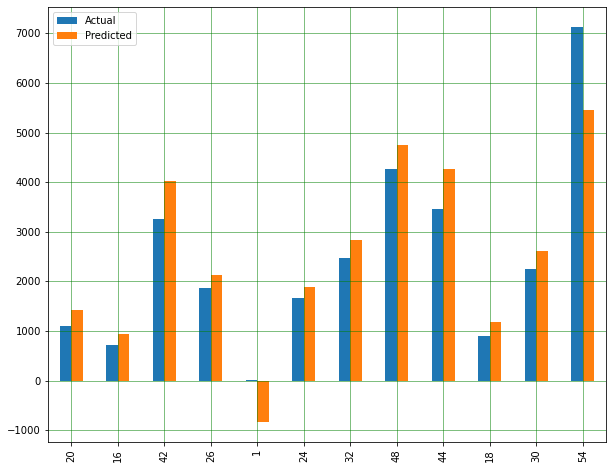

In [78]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

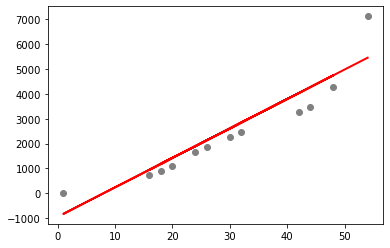

In [79]:
plt.scatter(X_test, y2_test,  color='gray')
plt.plot(X_test, y2_pred, color='red', linewidth=2)
plt.show()

In [80]:
R2 = metrics.r2_score(y2_test, y2_pred)
print('R^2:' , R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Adjusted R^2 :'  , 1 - metrics.r2_score(y2_test, y2_pred))
print('Mean Absolute Error:' , metrics.mean_absolute_error(y2_test, y2_pred)) 
print('Mean Squared Error:' , metrics.mean_squared_error(y2_test, y2_pred)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

R^2: 0.862565303753617
Adjusted R^2 : 0.8488218341289786
Adjusted R^2 : 0.13743469624638305
Mean Absolute Error: 551.8960403393713
Mean Squared Error: 468237.2156059365
Root Mean Squared Error: 684.2786096364086


Model for 'Recovered':

In [81]:
X = df['day_count'].values.reshape(-1,1)
y3 = df['recovered']
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=101)

In [82]:
model3 = LinearRegression()
model3.fit(X_train, y3_train)

LinearRegression()

In [83]:
y3_pred = model3.predict(X_test)

In [84]:
df3 = pd.DataFrame({'Actual': y3_test, 'Predicted': y3_pred})
df3

,Actual,Predicted
20,4683.0,14678.040399
16,2011.0,8376.630639
42,51171.0,49335.794079
26,12583.0,24130.155039
1,30.0,-15253.655962
24,9395.0,20979.450159
32,23394.0,33582.269679
48,64404.0,58787.908720
44,55866.0,52486.498960
18,3244.0,11527.335519


In [85]:
R2 = metrics.r2_score(y3_test, y3_pred)
print('R^2:' , R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Adjusted R^2 :'  , 1 - metrics.r2_score(y3_test, y3_pred))
print('Mean Absolute Error:' , metrics.mean_absolute_error(y3_test, y3_pred)) 
print('Mean Squared Error:' , metrics.mean_squared_error(y3_test, y3_pred)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

R^2: 0.8707546732091536
Adjusted R^2 : 0.8578301405300689
Adjusted R^2 : 0.12924532679084644
Mean Absolute Error: 8788.98975634414
Mean Squared Error: 90873569.84641375
Root Mean Squared Error: 9532.762970220845


Model for 'Infected':

In [86]:
X = df['day_count'].values.reshape(-1,1)
y4 = df['infected']
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.2, random_state=101)

In [87]:
model4 = LinearRegression()
model4.fit(X_train, y4_train)

LinearRegression()

In [88]:
y4_pred = model4.predict(X_test)

In [89]:
df4 = pd.DataFrame({'Actual': y4_test, 'Predicted': y4_pred})
df4

,Actual,Predicted
20,39007.0,30163.841656
16,31662.0,24690.186225
42,40699.0,60268.946526
26,58809.0,38374.324802
1,605.0,4163.978359
24,57971.0,35637.497087
32,53122.0,46584.807949
48,49916.0,68479.429673
44,42474.0,63005.774242
18,36001.0,27427.013940


In [90]:
R2 = metrics.r2_score(y4_test, y4_pred)
print('R^2:' , R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Adjusted R^2 :'  , 1 - metrics.r2_score(y4_test, y4_pred))
print('Mean Absolute Error:' , metrics.mean_absolute_error(y4_test, y4_pred)) 
print('Mean Squared Error:' , metrics.mean_squared_error(y4_test, y4_pred)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))

R^2: 0.47729610527090505
Adjusted R^2 : 0.42502571579799553
Adjusted R^2 : 0.522703894729095
Mean Absolute Error: 13951.213674016864
Mean Squared Error: 237295853.2221249
Root Mean Squared Error: 15404.41018741467


All predictions:

In [40]:
next7 = np.array([57,58,59,60,61,62,63,64])
next7 = next7.reshape(-1,1)

In [100]:
confirmed7 = model.predict(next7).round()
deaths7 = model2.predict(next7).round()
recovered7 = model3.predict(next7).round()
infected7 = model4.predict(next7).round()
nextdf = pd.DataFrame(zip(next7,confirmed7,deaths7,recovered7, infected7), columns = ["next7",'confirmed','deaths','recovered','infected'])

In [101]:
nextdf

,next7,confirmed,deaths,recovered,infected
0,[57],159573.0,5812.0,72966.0,80795.0
1,[58],162636.0,5931.0,74541.0,82164.0
2,[59],165698.0,6049.0,76117.0,83532.0
3,[60],168761.0,6168.0,77692.0,84900.0
4,[61],171823.0,6287.0,79267.0,86269.0
5,[62],174886.0,6406.0,80843.0,87637.0
6,[63],177948.0,6524.0,82418.0,89006.0
7,[64],181011.0,6643.0,83994.0,90374.0
